In [1]:
import networkx as nx
import community
from importlib import reload
reload(community)

<module 'community' from '/Users/ishaanwatts/opt/anaconda3/lib/python3.7/site-packages/community/__init__.py'>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
import community.community_louvain as community_louvain

In [4]:
correlation = []

In [5]:
correlation.append(pd.read_csv('Info_4year/Correlation_matrix_4year.csv', index_col=0))
correlation.append(pd.read_csv('Info_4year/Correlation_matrix_4year_0.csv', index_col=0))
correlation.append(pd.read_csv('Info_4year/Correlation_matrix_4year_1.csv', index_col=0))
correlation.append(pd.read_csv('Info_4year/Correlation_matrix_4year_2.csv', index_col=0))
correlation.append(pd.read_csv('Info_4year/Correlation_matrix_4year_3.csv', index_col=0))

In [7]:
dict_correlation = [corr.to_dict() for corr in correlation]

In [8]:
len(dict_correlation)

5

## Winner Takes All

In [9]:
def get_modularity(y, threshold):
    dict_corr = dict_correlation[y]
    elist = []
    for i in dict_corr.keys():
        for j in dict_corr[i].keys():
            if (abs(dict_corr[i][j]) > threshold):
                if i == j:
                    continue
                elif i < j: 
                    elist.append([i, j,{'weight':abs(dict_corr[i][j])}])
                else:
                    None
                    
    G=nx.Graph()
    G.add_edges_from(elist)
    partition = community.best_partition(G)
    
    G_val = {}
    G_val['nodes'] =  int(nx.number_of_nodes(G))
    G_val['edges'] =  int(nx.number_of_edges(G))
    
    try:
        m = community_louvain.modularity(partition, G)
    except:
        m = 0 
        
        
    print(f'Threshold --> {threshold}')
    print(G_val)
    print(f'Modularity --> {m}')
    print('-----------')
    
    return m

fractions = np.arange(0.30, 0.90, 0.05)

M_list = {}

for i in range(len(dict_correlation)):
    print(f'Window {i}')
    M_list[i] = [get_modularity(i, frac)  for frac in fractions ]

Window 0
Threshold --> 0.3
{'nodes': 30, 'edges': 281}
Modularity --> 0.06206475881288678
-----------
Threshold --> 0.35
{'nodes': 29, 'edges': 201}
Modularity --> 0.11521114624354653
-----------
Threshold --> 0.39999999999999997
{'nodes': 28, 'edges': 123}
Modularity --> 0.17252124000928026
-----------
Threshold --> 0.44999999999999996
{'nodes': 24, 'edges': 65}
Modularity --> 0.30011334303050985
-----------
Threshold --> 0.49999999999999994
{'nodes': 21, 'edges': 33}
Modularity --> 0.506146513078106
-----------
Threshold --> 0.5499999999999999
{'nodes': 13, 'edges': 12}
Modularity --> 0.567177984852786
-----------
Threshold --> 0.5999999999999999
{'nodes': 9, 'edges': 5}
Modularity --> 0.7267137332591092
-----------
Threshold --> 0.6499999999999999
{'nodes': 6, 'edges': 3}
Modularity --> 0.6644834088395248
-----------
Threshold --> 0.7
{'nodes': 4, 'edges': 2}
Modularity --> 0.4974347875952303
-----------
Threshold --> 0.7499999999999999
{'nodes': 2, 'edges': 1}
Modularity --> 0.0
--

In [10]:
thresholds = [0.5,0.4,0.45,0.60,0.45]

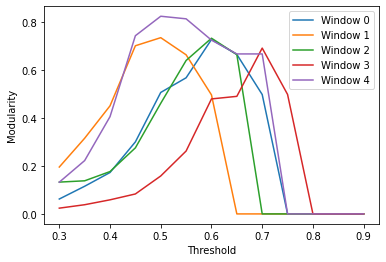

In [11]:
for i in range(len(dict_correlation)):
    
    plt.plot(fractions, M_list[i], label = f'Window {i}')
    
plt.legend()    
plt.xlabel('Threshold')
plt.ylabel('Modularity')
plt.show()

In [5]:
sect_df = pd.read_csv("NIFTY200_StockList.csv")
sect_df.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,ACC Ltd.,CEMENT & CEMENT PRODUCTS,ACC,EQ,INE012A01025
1,AU Small Finance Bank Ltd.,FINANCIAL SERVICES,AUBANK,EQ,INE949L01017
2,Aarti Industries Ltd.,CHEMICALS,AARTIIND,EQ,INE769A01020
3,Adani Enterprises Ltd.,METALS,ADANIENT,EQ,INE423A01024
4,Adani Green Energy Ltd.,POWER,ADANIGREEN,EQ,INE364U01010


In [6]:
values = sect_df.set_index('Symbol').to_dict(orient='dict')['Industry']

In [8]:
values

{'ACC': 'CEMENT & CEMENT PRODUCTS',
 'AUBANK': 'FINANCIAL SERVICES',
 'AARTIIND': 'CHEMICALS',
 'ADANIENT': 'METALS',
 'ADANIGREEN': 'POWER',
 'ADANIPORTS': 'SERVICES',
 'ATGL': 'OIL & GAS',
 'ADANITRANS': 'POWER',
 'ABCAPITAL': 'FINANCIAL SERVICES',
 'ABFRL': 'CONSUMER SERVICES',
 'AJANTPHARM': 'PHARMA',
 'APLLTD': 'PHARMA',
 'ALKEM': 'PHARMA',
 'AMARAJABAT': 'AUTOMOBILE',
 'AMBUJACEM': 'CEMENT & CEMENT PRODUCTS',
 'APOLLOHOSP': 'HEALTHCARE SERVICES',
 'APOLLOTYRE': 'AUTOMOBILE',
 'ASHOKLEY': 'AUTOMOBILE',
 'ASIANPAINT': 'CONSUMER GOODS',
 'ASTRAL': 'INDUSTRIAL MANUFACTURING',
 'AUROPHARMA': 'PHARMA',
 'DMART': 'CONSUMER SERVICES',
 'AXISBANK': 'FINANCIAL SERVICES',
 'BAJAJ-AUTO': 'AUTOMOBILE',
 'BAJFINANCE': 'FINANCIAL SERVICES',
 'BAJAJFINSV': 'FINANCIAL SERVICES',
 'BAJAJHLDNG': 'FINANCIAL SERVICES',
 'BALKRISIND': 'AUTOMOBILE',
 'BANDHANBNK': 'FINANCIAL SERVICES',
 'BANKBARODA': 'FINANCIAL SERVICES',
 'BANKINDIA': 'FINANCIAL SERVICES',
 'BATAINDIA': 'CONSUMER GOODS',
 'BERGEPAINT'

In [7]:
crisis_df = pd.read_csv('Info_4year/crisis.csv', index_col=0)
crisis_df.head()

,Symbol,2018,2019,2020,2021,C2018,C2019,C2020,C2021
0,BAJAJ-AUTO,-15.113870,-8.512530,-4.831965,25.696242,White,White,White,Green
1,BAJAJFINSV,22.375629,64.917273,39.961419,190.581591,Green,Green,Green,Green
2,BAJFINANCE,34.521871,109.786108,112.683337,285.152469,Green,Green,Green,Green
3,BHARTIARTL,-17.418891,-8.406211,29.168168,54.979864,White,White,Green,Green
4,BRITANNIA,24.286969,27.677493,52.080344,65.481974,Green,Green,Green,Green


In [9]:
industry = []

for stock in crisis_df['Symbol']:
    industry.append(values[stock])

In [10]:
crisis_df['Industry'] = industry

In [12]:
crisis_df.head()

,Symbol,2018,2019,2020,2021,C2018,C2019,C2020,C2021,Industry
0,BAJAJ-AUTO,-15.113870,-8.512530,-4.831965,25.696242,White,White,White,Green,AUTOMOBILE
1,BAJAJFINSV,22.375629,64.917273,39.961419,190.581591,Green,Green,Green,Green,FINANCIAL SERVICES
2,BAJFINANCE,34.521871,109.786108,112.683337,285.152469,Green,Green,Green,Green,FINANCIAL SERVICES
3,BHARTIARTL,-17.418891,-8.406211,29.168168,54.979864,White,White,Green,Green,TELECOM
4,BRITANNIA,24.286969,27.677493,52.080344,65.481974,Green,Green,Green,Green,CONSUMER GOODS


In [15]:
metric = []

colour = ['C2018', 'C2019', 'C2020', 'C2021']

for i in range(len(crisis_df['Symbol'])):
    
    stock = crisis_df['Symbol'][i]
    score = 0
    
    for c in colour:
        if crisis_df[c][i] == 'White':
            score += 0
            
        elif crisis_df[c][i] == 'Red':
            score += -1
            
        elif crisis_df[c][i] == 'Green':
            score += 1
            
    metric.append(score)       

In [16]:
crisis_df['Score'] = metric

In [17]:
crisis_df.head()

,Symbol,2018,2019,2020,2021,C2018,C2019,C2020,C2021,Industry,Score
0,BAJAJ-AUTO,-15.113870,-8.512530,-4.831965,25.696242,White,White,White,Green,AUTOMOBILE,1
1,BAJAJFINSV,22.375629,64.917273,39.961419,190.581591,Green,Green,Green,Green,FINANCIAL SERVICES,4
2,BAJFINANCE,34.521871,109.786108,112.683337,285.152469,Green,Green,Green,Green,FINANCIAL SERVICES,4
3,BHARTIARTL,-17.418891,-8.406211,29.168168,54.979864,White,White,Green,Green,TELECOM,2
4,BRITANNIA,24.286969,27.677493,52.080344,65.481974,Green,Green,Green,Green,CONSUMER GOODS,4


In [18]:
types = np.unique(crisis_df['Industry'])
types

array(['AUTOMOBILE', 'CEMENT & CEMENT PRODUCTS', 'CONSTRUCTION',
       'CONSUMER GOODS', 'FINANCIAL SERVICES', 'IT', 'METALS',
       'OIL & GAS', 'PHARMA', 'POWER', 'TELECOM'], dtype=object)

In [28]:
covid_dict = {}

for i in types:
    covid_dict[i] = 0

In [29]:
count = {}

for i in types:
    count[i] = 0
    
for i in crisis_df['Industry']:
    count[i] += 1

In [30]:
count

{'AUTOMOBILE': 4,
 'CEMENT & CEMENT PRODUCTS': 3,
 'CONSTRUCTION': 1,
 'CONSUMER GOODS': 5,
 'FINANCIAL SERVICES': 6,
 'IT': 3,
 'METALS': 3,
 'OIL & GAS': 2,
 'PHARMA': 1,
 'POWER': 1,
 'TELECOM': 1}

In [31]:
covid_dict

{'AUTOMOBILE': 0,
 'CEMENT & CEMENT PRODUCTS': 0,
 'CONSTRUCTION': 0,
 'CONSUMER GOODS': 0,
 'FINANCIAL SERVICES': 0,
 'IT': 0,
 'METALS': 0,
 'OIL & GAS': 0,
 'PHARMA': 0,
 'POWER': 0,
 'TELECOM': 0}

In [32]:
for i in range(len(crisis_df['Symbol'])):
    
    covid_dict[crisis_df['Industry'][i]] += crisis_df['Score'][i]

In [34]:
for i in covid_dict.keys():
    covid_dict[i] = round(covid_dict[i]/count[i],2)

In [38]:
covid_dict

{'AUTOMOBILE': -0.75,
 'CEMENT & CEMENT PRODUCTS': 1.0,
 'CONSTRUCTION': 0.0,
 'CONSUMER GOODS': 3.0,
 'FINANCIAL SERVICES': 3.0,
 'IT': 3.67,
 'METALS': -1.33,
 'OIL & GAS': 0.5,
 'PHARMA': 2.0,
 'POWER': 0.0,
 'TELECOM': 2.0}

In [43]:
keys = covid_dict.keys()
keys

dict_keys(['AUTOMOBILE', 'CEMENT & CEMENT PRODUCTS', 'CONSTRUCTION', 'CONSUMER GOODS', 'FINANCIAL SERVICES', 'IT', 'METALS', 'OIL & GAS', 'PHARMA', 'POWER', 'TELECOM'])

In [45]:
val = covid_dict.values()
val

dict_values([-0.75, 1.0, 0.0, 3.0, 3.0, 3.67, -1.33, 0.5, 2.0, 0.0, 2.0])

In [46]:
covid_analysis = pd.DataFrame()
covid_analysis['Industry'] = keys
covid_analysis['Score'] = val

In [47]:
covid_analysis.head()

,Industry,Score
0,AUTOMOBILE,-0.75
1,CEMENT & CEMENT PRODUCTS,1.00
2,CONSTRUCTION,0.00
3,CONSUMER GOODS,3.00
4,FINANCIAL SERVICES,3.00


In [48]:
covid_analysis.to_csv('Info_4year/covid_analysis.csv')

In [18]:
c1 = crisis_df.set_index('Symbol').to_dict(orient='dict')['C2018']
c2 = crisis_df.set_index('Symbol').to_dict(orient='dict')['C2019']
c3 = crisis_df.set_index('Symbol').to_dict(orient='dict')['C2020']
c4 = crisis_df.set_index('Symbol').to_dict(orient='dict')['C2021']

In [19]:
Graphs = {}

Graphs_node_data = {}

def build_graph(y, threshold):
    dict_corr = dict_correlation[y]
    elist = []
    for i in dict_corr.keys():
        for j in dict_corr[i].keys():
            if (abs(dict_corr[i][j]) > threshold[y]):
                if i == j:
                    continue
                elif i < j: 
                    elist.append([i, j,{'weight':abs(dict_corr[i][j])}])
                else:
                    None
                    
    G = nx.Graph()
    G.add_edges_from(elist)
    G.add_nodes_from(correlation[y].index.values)

    for node, value in values.items():
        try:
            G.node[node]['Sector'] = value
        except:
            None
            
    for node, value in c1.items():
        try:
            G.node[node]['C2018'] = value
        except:
            None
            
    for node, value in c2.items():
        try:
            G.node[node]['C2019'] = value
        except:
            None
            
    for node, value in c3.items():
        try:
            G.node[node]['C2020'] = value
        except:
            None
            
    for node, value in c4.items():
        try:
            G.node[node]['C2021'] = value
        except:
            None           
            
    node_data = {} 
            
    partition = community_louvain.best_partition(G)
    
    deg_cent={(k,float(v)) for k,v in nx.degree_centrality(G).items()}
    degree = {(k,float(v)) for k,v in list(nx.degree(G))}
    close_cent= {(k,float(v)) for k,v in nx.closeness_centrality(G).items()}
    betw_cent= {(k,float(v)) for k,v in nx.betweenness_centrality(G).items()}
    
    node_data['community'] = partition
    node_data['degreecent'] = deg_cent
    node_data['closeness'] = close_cent
    node_data['sector'] = values
    node_data['betweenes'] = betw_cent
    node_data['degree'] = degree
    node_data['c1'] = c1
    node_data['c2'] = c2
    node_data['c3'] = c3
    node_data['c4'] = c4
    
    nx.set_node_attributes(G, partition, "community")  
    nx.set_node_attributes(G,  nx.degree_centrality(G), "degreecent")
    nx.set_node_attributes(G,  values, "sector")
    nx.set_node_attributes(G, nx.closeness_centrality(G), "closeness")
    nx.set_node_attributes(G, nx.betweenness_centrality(G),"betweenness")
    nx.set_node_attributes(G,  c1, "c1")
    nx.set_node_attributes(G,  c2, "c2")
    nx.set_node_attributes(G,  c3, "c3")
    nx.set_node_attributes(G,  c4, "c4")
    
    Graphs[y] = G
    Graphs_node_data[y] = node_data
    
    nx.write_gexf(G,f'Info_4year/graph4_{y}.gexf')

In [20]:
for i in range(len(dict_correlation)):
    build_graph(i, thresholds)

In [21]:
from scipy.stats import linregress

In [22]:
Graphs_info = {}

j = 2018
for Y in Graphs.keys():
    
    G_val = {}
    
    G = Graphs[Y]
    
    G_val['nodes'] =  nx.number_of_nodes(G)
    G_val['edges'] =  nx.number_of_edges(G)
    #G_val['AvgDegree'] =  nx.average_degree(G)
    G_val['AvgClustering'] = nx.average_clustering(G)
    
    try:
        G_val['AvgShortestPathLength'] = nx.average_shortest_path_length(G)
    except:
        G_val['AvgShortestPathLength'] = 99999
        
    try:
        G_val['Diameter'] = nx.diameter(G)
    except:
        G_val['Diameter'] = 99999
     
    avg_degree = 0
    degs = {}
    for n in G.nodes() :
        deg = G.degree(n)
        avg_degree += deg
        
        if deg not in degs.keys() :
            degs[deg] = 0
        degs[deg] += 1
    items = sorted(degs.items())
    del items[0]
    
    avg_degree = avg_degree/30
    
    G_val['AvgDegree'] =  avg_degree
    
    x = [k for (k,v) in items]
    y = [v for (k,v) in items]
    
    xlog = np.array([np.log(k) for (k ,v) in items])
    ylog = np.array([np.log(v) for (k ,v) in items])

#     plt.scatter(xlog,ylog)
#     slope,intercept,rvalue,pvalue,stderr=linregress(xlog,ylog)
#     G_val['Slope'] = slope
#     plt.plot(xlog, (slope * xlog + intercept), color='red')
#     plt.title(f'Day {j}, slope {slope}')
#     plt.savefig(f'Info_1year/log{j}.jpg', dpi=1200, bbox_inches = 'tight')
#     plt.show()
    
#     data = [G.degree(n) for n in G.nodes()]
#     pdf, bins, patch = plt.hist(data, bins = 10)
#     plt.ylabel('Nodes')
#     plt.xlabel('Degree')
#     plt.title(f'Day {j}, slope {slope}')
#     plt.savefig(f'Info_1year/hist{j}.jpg', dpi=1200, bbox_inches = 'tight')
#     plt.show()
    
    Graphs_info[Y] = G_val
    
    j += 62
    
Graph_df = pd.DataFrame(Graphs_info).T

In [23]:
Graphs_info

{0: {'nodes': 30,
  'edges': 33,
  'AvgClustering': 0.3351587301587301,
  'AvgShortestPathLength': 99999,
  'Diameter': 99999,
  'AvgDegree': 2.2},
 1: {'nodes': 30,
  'edges': 22,
  'AvgClustering': 0.20587301587301587,
  'AvgShortestPathLength': 99999,
  'Diameter': 99999,
  'AvgDegree': 1.4666666666666666},
 2: {'nodes': 30,
  'edges': 47,
  'AvgClustering': 0.34904761904761905,
  'AvgShortestPathLength': 99999,
  'Diameter': 99999,
  'AvgDegree': 3.1333333333333333},
 3: {'nodes': 30,
  'edges': 42,
  'AvgClustering': 0.3987037037037037,
  'AvgShortestPathLength': 99999,
  'Diameter': 99999,
  'AvgDegree': 2.8},
 4: {'nodes': 30,
  'edges': 27,
  'AvgClustering': 0.48555555555555563,
  'AvgShortestPathLength': 99999,
  'Diameter': 99999,
  'AvgDegree': 1.8}}

In [33]:
Graphs_node_data[0]['c4']

{'BAJAJ-AUTO': 'Green',
 'BAJAJFINSV': 'Green',
 'BAJFINANCE': 'Green',
 'BHARTIARTL': 'Green',
 'BRITANNIA': 'Green',
 'CIPLA': 'Green',
 'COALINDIA': 'Red',
 'GRASIM': 'Green',
 'HDFCLIFE': 'Green',
 'HEROMOTOCO': 'White',
 'HINDALCO': 'Green',
 'ICICIBANK': 'Green',
 'INDUSINDBK': 'Red',
 'ITC': 'White',
 'KOTAKBANK': 'Green',
 'LT': 'Green',
 'M&M': 'Green',
 'MARUTI': 'Red',
 'NESTLEIND': 'Green',
 'NTPC': 'Green',
 'ONGC': 'Red',
 'RELIANCE': 'Green',
 'SHREECEM': 'Green',
 'TATACONSUM': 'Green',
 'TATASTEEL': 'Green',
 'TCS': 'Green',
 'TECHM': 'Green',
 'TITAN': 'Green',
 'ULTRACEMCO': 'Green',
 'WIPRO': 'Green'}

In [34]:
Graph_df.head()

,nodes,edges,AvgClustering,AvgShortestPathLength,Diameter,AvgDegree
0,30.0,33.0,0.335159,99999.0,99999.0,2.200000
1,30.0,22.0,0.205873,99999.0,99999.0,1.466667
2,30.0,47.0,0.349048,99999.0,99999.0,3.133333
3,30.0,42.0,0.398704,99999.0,99999.0,2.800000
4,30.0,27.0,0.485556,99999.0,99999.0,1.800000


In [42]:
Graph_df.to_csv('Info_4year/graph4_info.csv')

## MST

In [35]:
def calc_d(x):
    x = round(x,3)
    d = math.sqrt(2 * (1 - x))
    return d

In [36]:
dist_dict = {}

for i in range(len(correlation)):
      dist_dict[i] = correlation[i].applymap(calc_d)

In [37]:
dist_dict[4]

,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BHARTIARTL,BRITANNIA,CIPLA,COALINDIA,GRASIM,HDFCLIFE,HEROMOTOCO,...,ONGC,RELIANCE,SHREECEM,TATACONSUM,TATASTEEL,TCS,TECHM,TITAN,ULTRACEMCO,WIPRO
BAJAJ-AUTO,0.000000,1.191638,1.122497,1.260952,1.346105,1.363818,1.209959,1.148913,1.230447,0.855570,...,1.226377,1.162755,1.214084,1.173030,1.214907,1.324387,1.324387,1.122497,1.170470,1.270433
BAJAJFINSV,1.191638,0.000000,0.715542,1.161895,1.343131,1.444299,1.230447,1.099091,1.156719,1.195826,...,1.182371,1.141928,1.136662,1.171324,1.056409,1.272792,1.228007,1.097269,1.129602,1.228821
BAJFINANCE,1.122497,0.715542,0.000000,1.135782,1.296919,1.504659,1.210785,1.086278,1.189117,1.141052,...,1.155855,1.085357,1.146298,1.149783,1.109955,1.289961,1.265701,1.113553,1.093618,1.257776
BHARTIARTL,1.260952,1.161895,1.135782,0.000000,1.313012,1.392839,1.202497,1.158447,1.210785,1.234504,...,1.243382,1.200833,1.230447,1.227192,1.184905,1.227192,1.223111,1.255388,1.202497,1.241773
BRITANNIA,1.346105,1.343131,1.296919,1.313012,0.000000,1.336413,1.352775,1.271220,1.322120,1.301538,...,1.360147,1.284523,1.204159,1.152389,1.351296,1.200000,1.283745,1.232883,1.273578,1.260952
CIPLA,1.363818,1.444299,1.504659,1.392839,1.336413,0.000000,1.376227,1.421970,1.386362,1.402854,...,1.456022,1.430385,1.371131,1.384197,1.415627,1.293832,1.307670,1.394274,1.430385,1.320606
COALINDIA,1.209959,1.230447,1.210785,1.202497,1.352775,1.376227,0.000000,1.112654,1.195826,1.148042,...,0.957079,1.140175,1.246595,1.273578,1.063015,1.301538,1.272792,1.266491,1.268069,1.323631
GRASIM,1.148913,1.099091,1.086278,1.158447,1.271220,1.421970,1.112654,0.000000,1.166190,1.092703,...,1.132254,1.108152,0.961249,1.134019,1.037304,1.281405,1.219016,1.146298,0.860233,1.193315
HDFCLIFE,1.230447,1.156719,1.189117,1.210785,1.322120,1.386362,1.195826,1.166190,0.000000,1.154123,...,1.240967,1.111755,1.194152,1.154123,1.219016,1.203329,1.220656,1.193315,1.194152,1.292285
HEROMOTOCO,0.855570,1.195826,1.141052,1.234504,1.301538,1.402854,1.148042,1.092703,1.154123,0.000000,...,1.130487,1.131371,1.192476,1.124278,1.176435,1.284523,1.264911,1.076104,1.141052,1.240967


In [38]:
elistmst_dict={}

for y in dist_dict.keys():
    price_corr = dist_dict[y]
    
    elistmst = []
    outdict = price_corr.to_dict()
    
    for i in outdict.keys():
        for j in outdict[i].keys():
            if (abs(outdict[i][j]) > 0 and (i>j)):
                elistmst.append([i,j,dict(weight=abs(outdict[i][j]))])
                
    elistmst_dict[y] = elistmst

In [39]:
Graphs_MST_dict = {}
Graphs_MST_node_data = {}

for y in elistmst_dict.keys():
    
    G=nx.Graph()
    elist = elistmst_dict[y]
    
    G.add_edges_from(elist)
    T = nx.minimum_spanning_tree(G)
    G = T
    
    for node, value in values.items():
        try:
            G.node[node]['Sector'] = value
        except:
            None
            
    for node, value in c1.items():
        try:
            G.node[node]['C2018'] = value
        except:
            None
            
    for node, value in c2.items():
        try:
            G.node[node]['C2019'] = value
        except:
            None
            
    for node, value in c3.items():
        try:
            G.node[node]['C2020'] = value
        except:
            None
            
    for node, value in c4.items():
        try:
            G.node[node]['C2021'] = value
        except:
            None
            
    partition = community.best_partition(G)
    
    node_data = {}
    
    deg_cent={(k,float(v)) for k,v in nx.degree_centrality(G).items()}
    degree = {(k,float(v)) for k,v in list(nx.degree(G))}
    close_cent= {(k,float(v)) for k,v in nx.closeness_centrality(G).items()}
    betw_cent= {(k,float(v)) for k,v in nx.betweenness_centrality(G).items()}
    
    node_data['community'] = partition
    node_data['degreecent'] = deg_cent
    node_data['closeness'] = close_cent
    node_data['sector'] = values
    node_data['betweenes'] = betw_cent
    node_data['degree'] = degree
    node_data['c1'] = c1
    node_data['c2'] = c2
    node_data['c3'] = c3
    node_data['c4'] = c4
    
    nx.set_node_attributes(G, partition, "community")  
    nx.set_node_attributes(G,  nx.degree_centrality(G), "degreecent")
    nx.set_node_attributes(G,  values, "sector")
    nx.set_node_attributes(G, nx.closeness_centrality(G), "closeness")
    nx.set_node_attributes(G, nx.betweenness_centrality(G),"betweenness")
    nx.set_node_attributes(G,  c1, "c1")
    nx.set_node_attributes(G,  c2, "c2")
    nx.set_node_attributes(G,  c3, "c3")
    nx.set_node_attributes(G,  c4, "c4")
    
    T = G
    Graphs_MST_dict[y] = T
    Graphs_MST_node_data[y] = node_data
    
    nx.write_gexf(T,f'Info_4year/graph4_mst_{y}.gexf')

In [40]:
G_valMST_dict = {}

j = 62

for Y in Graphs_MST_dict.keys():
    G_val = {}
    G = Graphs_MST_dict[Y]
    
    G_val['nodes'] =  nx.number_of_nodes(G)
    G_val['edges'] =  nx.number_of_edges(G)
    
    G_val['AvgClustering'] = nx.average_clustering(G)
    
    try:
        G_val['AvgShortestPathLength'] = nx.average_shortest_path_length(G)
    except:
        G_val['AvgShortestPathLength'] = 99999
    try:
        G_val['Diameter'] = nx.diameter(G)
    except:
        G_val['Diameter'] = 99999
    
    avg_degree = 0
    degs = {}
    for n in G.nodes() :
        deg = G.degree(n)
        avg_degree += deg
        if deg not in degs.keys() :
            degs[deg] = 0
        degs[deg] += 1
    items = sorted(degs.items())
    
    avg_degree = avg_degree/30
    
    x= [k for (k ,v) in items]
    y= [v for (k ,v) in items]
    
    xlog= np.array([np.log(k) for (k ,v) in items])
    ylog= np.array([np.log(v) for (k ,v) in items])
    
    slope,intercept,rvalue,pvalue,stderr=linregress(xlog,ylog)
    G_val['Slope'] = slope
    
    G_val['AvgDegree'] =  avg_degree
    
#     plt.scatter(xlog,ylog)
#     plt.plot(xlog, (slope * xlog + intercept), color='red')
#     plt.title(f'Day {j}, slope {slope}')
#     plt.savefig(f'Info_1year/mst_log{j}.jpg', dpi=1200, bbox_inches = 'tight')
#     plt.show()
    
#     data = [G.degree(n) for n in G.nodes()]
#     pdf, bins, patch = plt.hist(data, bins = 10)
#     plt.title(f'Day {j}, slope {slope}')
#     plt.ylabel('Nodes')
#     plt.xlabel('Degree')
#     plt.savefig(f'Info_1year/mst_hist{j}.jpg', dpi=1200, bbox_inches = 'tight')
#     plt.show()
    
    j += 62
    
    G_valMST_dict[Y] = G_val
    
GMST_df = pd.DataFrame(G_valMST_dict).T

In [41]:
GMST_df.head()

,nodes,edges,AvgClustering,AvgShortestPathLength,Diameter,Slope,AvgDegree
0,30.0,29.0,0.0,4.211494,9.0,-1.649803,1.933333
1,30.0,29.0,0.0,4.563218,10.0,-1.053517,1.933333
2,30.0,29.0,0.0,4.544828,11.0,-1.416700,1.933333
3,30.0,29.0,0.0,4.859770,10.0,-1.591952,1.933333
4,30.0,29.0,0.0,5.105747,10.0,-1.423856,1.933333


In [42]:
GMST_df.to_csv('Info_4year/graph4_mst_info.csv')

# Results

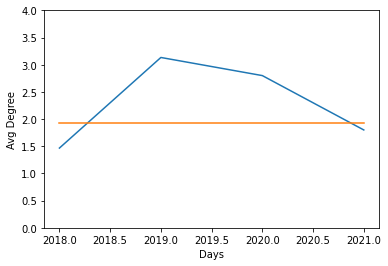

In [56]:
plt.plot([2018,2019,2020,2021], Graph_df['AvgDegree'][1:])
plt.plot([2018,2019,2020,2021], GMST_df['AvgDegree'][1:])
plt.xlabel('Days')
plt.ylabel('Avg Degree')
plt.ylim(0,4)
plt.savefig(f'Info_4year/avgdegree.jpg', dpi=1200, bbox_inches = 'tight')
plt.show()

In [58]:
for y in range(1,5):
    data = Graphs_node_data[y]
    
    for key in data.keys():
        a = list(data[key])
        
        if key == 'closeness':
            a.sort(key = lambda x: x[1])     
        else:
            a.sort(key = lambda x: x[1], reverse= True)
            
        data[key] = a

In [59]:
for key in Graphs_node_data[0].keys():
    print(key)

community
degreecent
closeness
sector
betweenes
degree


In [60]:
metric = ['degree', 'betweenes', 'closeness', 'degreecent']

In [61]:
params = ['Degree', 'Betweeness Centrality', 'Closeness Centrality', 'Degree Centrality']

In [63]:
symbol_map = {}

In [64]:
for i in range(len(sect_df['Symbol'])):
    symbol_map[sect_df['Symbol'][i]] = [sect_df['Industry'][i], sect_df['Company Name'][i]]

In [75]:
k = 0

for m in metric:
    
    year = 2018
    
    window_no = []
    symbol = []
    val = []
    name = []
    sector = []
    
    df = pd.DataFrame()
    
    for y in range(1,5):
        for i in range(3):
            
            window_no.append(year)
            symbol.append(Graphs_node_data[y][m][i][0])
            val.append(Graphs_node_data[y][m][i][1])
            name.append(symbol_map[symbol[-1]][1])
            sector.append(symbol_map[symbol[-1]][0])
            
        year += 1
            
    
    df['Year'] = window_no
    df['Symbol'] = symbol
    df['Company Name'] = name
    df[params[k]] = val
    df['Industry'] = sector
    
    k+=1

    df.to_csv(f'Info_4year/{m}.csv')

In [76]:
high_degree = pd.read_csv('Info_4year/degree.csv', index_col=0)
high_degree.head()

,Year,Symbol,Company Name,Degree,Industry
0,2018,BAJAJFINSV,Bajaj Finserv Ltd.,8.0,FINANCIAL SERVICES
1,2018,ULTRACEMCO,UltraTech Cement Ltd.,6.0,CEMENT & CEMENT PRODUCTS
2,2018,LT,Larsen & Toubro Ltd.,4.0,CONSTRUCTION
3,2019,LT,Larsen & Toubro Ltd.,11.0,CONSTRUCTION
4,2019,ULTRACEMCO,UltraTech Cement Ltd.,11.0,CEMENT & CEMENT PRODUCTS


In [77]:
degree_centrality = pd.read_csv('Info_4year/degreecent.csv', index_col=0)
degree_centrality.head()

,Year,Symbol,Company Name,Degree Centrality,Industry
0,2018,BAJAJFINSV,Bajaj Finserv Ltd.,0.275862,FINANCIAL SERVICES
1,2018,ULTRACEMCO,UltraTech Cement Ltd.,0.206897,CEMENT & CEMENT PRODUCTS
2,2018,LT,Larsen & Toubro Ltd.,0.137931,CONSTRUCTION
3,2019,ULTRACEMCO,UltraTech Cement Ltd.,0.379310,CEMENT & CEMENT PRODUCTS
4,2019,LT,Larsen & Toubro Ltd.,0.379310,CONSTRUCTION


In [78]:
betweness_centrality = pd.read_csv('Info_4year/betweenes.csv', index_col=0)
betweness_centrality.head()

,Year,Symbol,Company Name,Betweeness Centrality,Industry
0,2018,BAJAJFINSV,Bajaj Finserv Ltd.,0.096059,FINANCIAL SERVICES
1,2018,ULTRACEMCO,UltraTech Cement Ltd.,0.056650,CEMENT & CEMENT PRODUCTS
2,2018,M&M,Mahindra & Mahindra Ltd.,0.021757,AUTOMOBILE
3,2019,ULTRACEMCO,UltraTech Cement Ltd.,0.101527,CEMENT & CEMENT PRODUCTS
4,2019,LT,Larsen & Toubro Ltd.,0.082537,CONSTRUCTION


In [79]:
for y in range(4):
    data = Graphs_MST_node_data[y]
    
    for key in data.keys():
        a = list(data[key])
        
        if key == 'closeness':
            a.sort(key = lambda x: x[1])
            
        else:
            a.sort(key = lambda x: x[1], reverse= True)
        data[key] = a

In [80]:
for key in Graphs_MST_node_data[0].keys():
    print(key)

community
degreecent
closeness
sector
betweenes
degree


In [81]:
k = 0
for m in metric:
    
    year = 2018
    window_no = []
    symbol = []
    val = []
    name = []
    sector = []
    
    df = pd.DataFrame()
    
    for y in range(4):
        for i in range(3):
            window_no.append(year)
            symbol.append(Graphs_MST_node_data[y][m][i][0])
            val.append(Graphs_MST_node_data[y][m][i][1])
            name.append(symbol_map[symbol[-1]][1])
            sector.append(symbol_map[symbol[-1]][0])
        year += 1
            
    df['Year'] = window_no
    df['Symbol'] = symbol
    df['Company Name'] = name
    df[params[k]] = val
    df['Industry'] = sector
    
    k+=1

    df.to_csv(f'Info_4year/MST_{m}.csv')

In [82]:
high_degree = pd.read_csv('Info_4year/MST_degree.csv', index_col=0)
high_degree.head()

,Year,Symbol,Company Name,Degree,Industry
0,2018,GRASIM,Grasim Industries Ltd.,6.0,CEMENT & CEMENT PRODUCTS
1,2018,MARUTI,Maruti Suzuki India Ltd.,5.0,AUTOMOBILE
2,2018,HINDALCO,Hindalco Industries Ltd.,4.0,METALS
3,2019,BAJAJFINSV,Bajaj Finserv Ltd.,5.0,FINANCIAL SERVICES
4,2019,ULTRACEMCO,UltraTech Cement Ltd.,5.0,CEMENT & CEMENT PRODUCTS


In [83]:
degree_centrality = pd.read_csv('Info_4year/MST_degreecent.csv', index_col=0)
degree_centrality.head()

,Year,Symbol,Company Name,Degree Centrality,Industry
0,2018,GRASIM,Grasim Industries Ltd.,0.206897,CEMENT & CEMENT PRODUCTS
1,2018,MARUTI,Maruti Suzuki India Ltd.,0.172414,AUTOMOBILE
2,2018,HINDALCO,Hindalco Industries Ltd.,0.137931,METALS
3,2019,BRITANNIA,Britannia Industries Ltd.,0.172414,CONSUMER GOODS
4,2019,ULTRACEMCO,UltraTech Cement Ltd.,0.172414,CEMENT & CEMENT PRODUCTS


In [84]:
betweness_centrality = pd.read_csv('Info_4year/MST_betweenes.csv', index_col=0)
betweness_centrality.head()

,Year,Symbol,Company Name,Betweeness Centrality,Industry
0,2018,GRASIM,Grasim Industries Ltd.,0.785714,CEMENT & CEMENT PRODUCTS
1,2018,HINDALCO,Hindalco Industries Ltd.,0.416256,METALS
2,2018,LT,Larsen & Toubro Ltd.,0.406404,CONSTRUCTION
3,2019,MARUTI,Maruti Suzuki India Ltd.,0.665025,AUTOMOBILE
4,2019,ULTRACEMCO,UltraTech Cement Ltd.,0.554187,CEMENT & CEMENT PRODUCTS
